## **Guided Project: Star Wars Survey** ⚫🤖⚔️

Enquanto esperam pelo lançamento de um novo filme da saga Star Wars, a equipe do site *FiveThirtyEight* resolveu fazer uma pesquisa para entender quais são os filmes favoritos dos fãs em meio a trilogia.

A equipe montou um formulário de pesquisa com algumas perguntas (que deram nome às colunas do dataset aqui explorado) e recebeu um total de 835 respostas.

### **Lendo o arquivo:**

In [70]:
import pandas as pd
link = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/star-wars-survey/StarWars.csv'
star_wars = pd.read_csv(link, encoding = 'ISO-8859-1')

In [71]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1187 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          837 non-null    object 
 3   Which of the following Star 

In [72]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### **Aplicando transformações:**

**1)** Algumas das colunas presentes no dataset possuem como respostas *Yes*, *No* ou *NaN*. Especialmente para as colunas **Have you seen any of the 6 films in the Star Wars franchise?** e **Do you consider yourself to be a fan of the Star Wars film franchise?** iremos fazer uma conversão para valores booleanos, uma vez que, desta forma, a seleção de linhas irá se tornar mais fácil.

In [73]:
yes_no = {'Yes': True, 'No': False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [74]:
star_wars[['Have you seen any of the 6 films in the Star Wars franchise?', 'Do you consider yourself to be a fan of the Star Wars film franchise?']]

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
0,NaN,NaN
1,True,True
2,False,NaN
3,True,False
4,True,True
...,...,...
1182,True,True
1183,True,True
1184,False,NaN
1185,True,True


**2)** Algumas colunas se referem a respostas que deveriam ser marcadas ou preenchidas pelo usuário que estava repondendo à pesquisa. Um exemplo disso são as colunas: **Which of the following Star Wars films have you seen? Please select all that apply.**, **Unnamed: 4**,	**Unnamed: 5**,	**Unnamed: 6**,	**Unnamed: 7**	e **Unnamed: 8**. As respostas dão a entender que cada uma se refere a um filme que pode ou não ter sido visto pelo usuário.

Vamos converter os valores destas colunas para booleanos. Vamos considerar que quando o valor preenchido for o nome de um filme, é possível considerar que o usuário assistiu a este filme e portanto o valor deve ser **True**. Caso o valor seja NaN, vamos considerar que o usuário ou não respondeu a pergunta ou não assistiu ao filme e que, portanto, o valor deve ser **False**.

Aproveitaremos também para renomear as colunas de uma forma mais intuitiva.

In [75]:
import numpy as np

In [76]:
def classification(element):
  if element is np.NaN:
    return False
  else:
    return True

In [77]:
columns_movie = ['Which of the following Star Wars films have you seen? Please select all that apply.', 
                 'Unnamed: 4','Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']

star_wars[columns_movie] = star_wars[columns_movie].applymap(classification)

In [78]:
star_wars[columns_movie]

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
...,...,...,...,...,...,...
1182,True,True,True,True,True,True
1183,True,True,True,True,True,True
1184,False,False,False,False,False,False
1185,True,True,True,True,True,True


In [79]:
star_wars = star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1', 
                                      'Unnamed: 4': 'seen_2',
                                      'Unnamed: 5': 'seen_3', 
                                      'Unnamed: 6': 'seen_4', 
                                      'Unnamed: 7': 'seen_5', 
                                      'Unnamed: 8': 'seen_6'})


In [80]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,NaN,True,True,True,True,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


**3)** Da coluna **Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.** até a coluna **Unnamed 14**, ao usuário é solicitado que coloque em ordem de preferência os filmes da saga, daquele que mais gostou até o que gostou menos.

Iremos converter os valores destas colunas para o tipo float. Porém, antes, para a primeira linha iremos trocar o nome dos filmes por uma ordem de preferência numérica.

Vamos também trocar o nome das colunas para algo que seja mais intuitivo (ranking_1, ranking_2 e assim por diante).

In [81]:
star_wars.loc[0, ['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
                  'Unnamed: 10',
                  'Unnamed: 11',
                  'Unnamed: 12',
                  'Unnamed: 13',
                  'Unnamed: 14']] = [1,2,3,4,5,6]

In [82]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,NaN,True,True,True,True,True,True,1,2,3,4,5,6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [83]:
star_wars[['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
                  'Unnamed: 10',
                  'Unnamed: 11',
                  'Unnamed: 12',
                  'Unnamed: 13',
                  'Unnamed: 14']] = star_wars[['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
                  'Unnamed: 10',
                  'Unnamed: 11',
                  'Unnamed: 12',
                  'Unnamed: 13',
                  'Unnamed: 14']].astype(float)

In [84]:
star_wars['Unnamed: 14'].dtype

dtype('float64')

In [85]:
new_names = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
                  'Unnamed: 10': 'ranking_2',
                  'Unnamed: 11': 'ranking_3',
                  'Unnamed: 12': 'ranking_4',
                  'Unnamed: 13': 'ranking_5',
                  'Unnamed: 14': 'ranking_6'}

In [86]:
star_wars = star_wars.copy()

In [87]:
star_wars.rename(columns = new_names, inplace = True)

In [88]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,NaN,True,True,True,True,True,True,1.0,2.0,3.0,4.0,5.0,6.0,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### **Analisando os dados:**

**1)** Agora que realizamos a limpeza destas colunas, podemos utilizar a média para descobrir qual filme teve a maior preferência entre aqueles que responderam a pesquisa.

In [89]:
ranking = star_wars[['ranking_1',
           'ranking_2',
           'ranking_3',
           'ranking_4',
           'ranking_5',
           'ranking_6']].mean()

ranking

ranking_1    3.729665
ranking_2    4.084827
ranking_3    4.339713
ranking_4    3.273596
ranking_5    2.516129
ranking_6    3.051374
dtype: float64

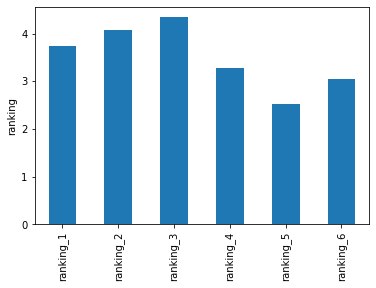

In [90]:
import matplotlib.pyplot as plt

ranking.plot.bar()
plt.ylabel('ranking')
plt.show()

**Filmes preferidos:**

- **1º lugar** - ranking 5 - Episode V The Empire Strikes Back	Star Wars
- **2º lugar** - ranking 6 - Episode VI Return of the Jedi
- **3º lugar** - ranking 4 - Episode IV A New Hope	Star Wars
- **4º lugar** - ranking 1 - Star Wars: Episode I The Phantom Menace	Star Wars 
- **5º lugar** - ranking 2 - Episode II Attack of the Clones	Star Wars
- **6º lugar** - ranking 3 - Episode III Revenge of the Sith	Star Wars

**2)** Com base nas transformações realizadas podemos também classificar quais foram os filmes mais assistidos por aqueles que responderam as perguntas:

In [91]:
seen = star_wars[['seen_1', 'seen_2', 'seen_3', 'seen_4',
                  'seen_5', 'seen_6']].sum()
seen

seen_1    674
seen_2    572
seen_3    551
seen_4    608
seen_5    759
seen_6    739
dtype: int64

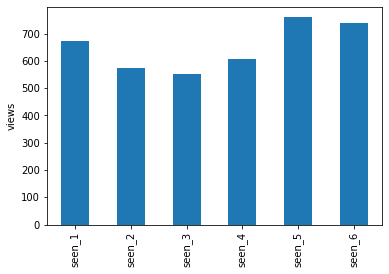

In [94]:
seen.plot.bar()
plt.ylabel('views')
plt.show()

**Filmes mais vistos:**

- **1º lugar** - seen 5 - Episode V The Empire Strikes Back	Star Wars
- **2º lugar** - seen 6 - Episode VI Return of the Jedi
- **3º lugar** - seen 1 - Star Wars: Episode I The Phantom Menace	Star Wars
- **4º lugar** - seen 4 - Episode IV A New Hope	Star Wars
- **5º lugar** - seen 2 - Episode II Attack of the Clones	Star Wars
- **6º lugar** - seen 3 - Episode III Revenge of the Sith	Star Wars

O filmes mais vistos são justamente aqueles que receberam melhores classificações no ranking anterior.

**3)** Agora vamos examinar como certos seguimentos responderam a pesquisa, primeiro vamos dividir por gênero e pesquisar por estatísticas dentro de cada grupo.

In [95]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

In [96]:
ranking_male = males[['ranking_1',
           'ranking_2',
           'ranking_3',
           'ranking_4',
           'ranking_5',
           'ranking_6']].mean()

ranking_male

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64

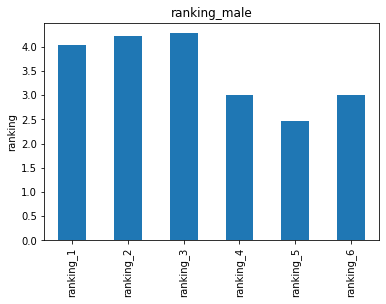

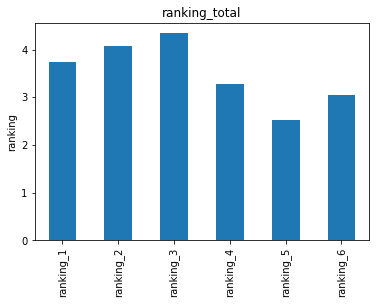

In [100]:
ranking_male.plot.bar()
plt.ylabel('ranking')
plt.title('ranking_male')
plt.show()

ranking.plot.bar()
plt.ylabel('ranking')
plt.title('ranking_total')
plt.show()

In [101]:
ranking_female = females[['ranking_1',
           'ranking_2',
           'ranking_3',
           'ranking_4',
           'ranking_5',
           'ranking_6']].mean()

ranking_female

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64

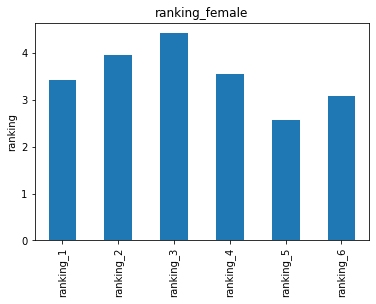

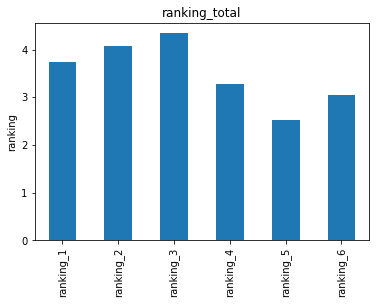

In [102]:
ranking_female.plot.bar()
plt.ylabel('ranking')
plt.title('ranking_female')
plt.show()

ranking.plot.bar()
plt.ylabel('ranking')
plt.title('ranking_total')
plt.show()

In [103]:
seen_male = males[['seen_1', 'seen_2', 'seen_3', 'seen_4',
                  'seen_5', 'seen_6']].sum()
seen_male

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64

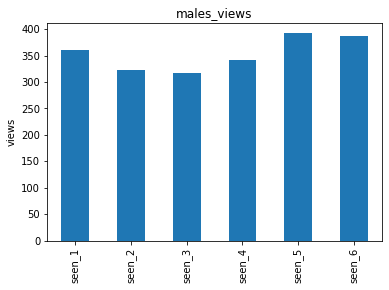

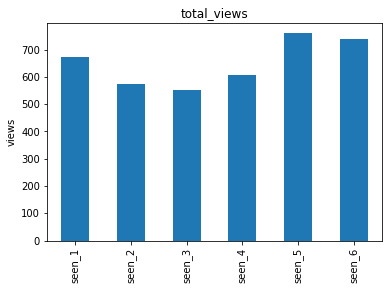

In [105]:
seen_male.plot.bar()
plt.ylabel('views')
plt.title('males_views')
plt.show()

seen.plot.bar()
plt.ylabel('views')
plt.title('total_views')
plt.show()

In [106]:
seen_female = females[['seen_1', 'seen_2', 'seen_3', 'seen_4',
                  'seen_5', 'seen_6']].sum()

seen_female

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

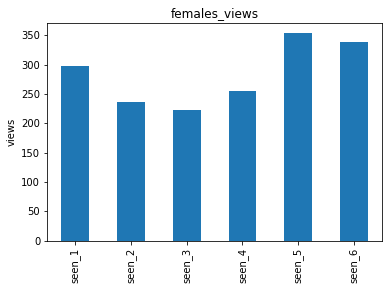

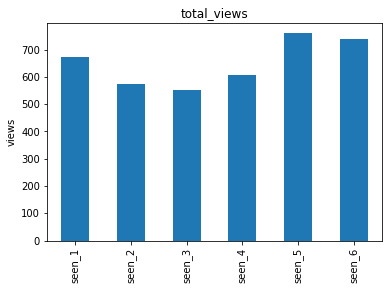

In [107]:
seen_female.plot.bar()
plt.ylabel('views')
plt.title('females_views')
plt.show()

seen.plot.bar()
plt.ylabel('views')
plt.title('total_views')
plt.show()

De uma forma geral, as análises por gênero seguem o mesmo padrão das análises feitas anteriormente levando em consideração os dados como um todo, tanto para o ranking quanto para filmes mais vistos.

**4)** Há diferença no rankeamento dos filmes entre aqueles que se considerem fãs e aqueles que não se consideram fãs da saga?

In [108]:
fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
non_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

In [109]:
fan_ranking = fan[['ranking_1',
           'ranking_2',
           'ranking_3',
           'ranking_4',
           'ranking_5',
           'ranking_6']].mean()
fan_ranking

ranking_1    4.141304
ranking_2    4.342391
ranking_3    4.417423
ranking_4    2.932971
ranking_5    2.333333
ranking_6    2.829710
dtype: float64

In [110]:
non_fan_ranking = non_fan[['ranking_1',
           'ranking_2',
           'ranking_3',
           'ranking_4',
           'ranking_5',
           'ranking_6']].mean()
non_fan_ranking

ranking_1    2.936396
ranking_2    3.591549
ranking_3    4.193662
ranking_4    3.933099
ranking_5    2.862676
ranking_6    3.471831
dtype: float64

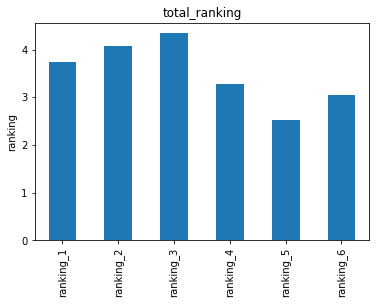

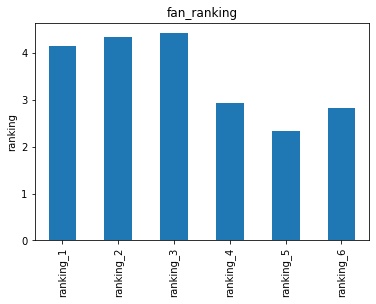

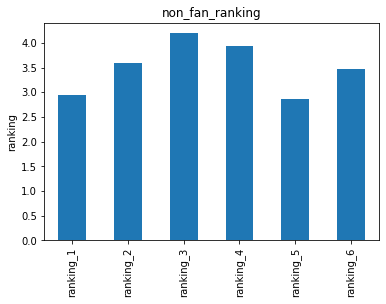

In [111]:
ranking.plot.bar()
plt.ylabel('ranking')
plt.title('total_ranking')
plt.show()

fan_ranking.plot.bar()
plt.ylabel('ranking')
plt.title('fan_ranking')
plt.show()

non_fan_ranking.plot.bar()
plt.ylabel('ranking')
plt.title('non_fan_ranking')
plt.show()

O padrão ainda é parecido: os filmes preferidos daqueles que se consideram fãs, também são prediletos por aqueles que não se consideram fãs.